Import packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
import datetime as dt

Import data

In [2]:
df = pds.read_csv('../../bus203_all_labelled.csv')

One hot encode segments, normalize timestamp and create final dataset

In [3]:
# Normalize timestamp
df['timestamp'] = df['timestamp'].str[11:13].astype(int)/24

# Make segments categorical
dataset = pds.get_dummies(df['segment_number'])

# Combine segments and timestamp, add time from stop 0 to current time for brazil model
dataset['timestamp'] = df['timestamp']


Divide training and test data, 80% training data

In [4]:
msk = np.random.rand(len(df))<0.8
train_input = dataset[msk]
test_input = dataset[~msk]

train_labels = df['label'][msk]
test_labels = df['label'][~msk]

Build model

In [5]:
model = keras.Sequential([
	keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_input.shape[1],)),
	keras.layers.Dense(1)
	])

optimizer = tf.train.RMSPropOptimizer(0.001)
model.compile(loss='mse', optimizer = optimizer, metrics=['mae'])

Fit model

In [6]:
EPOCHS=1
model.fit(train_input.values, train_labels.values, epochs = EPOCHS)

Epoch 1/1
5545164/5545164 [==============================] - 157s 28us/step - loss: 908.6402 - mean_absolute_error: 18.7902


Make predictions

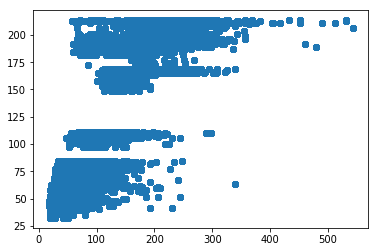

In [7]:
test_predictions = model.predict(test_input.values)
plt.scatter(test_labels.values, test_predictions)
plt.show()